In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import shnitsel as st
import shnitsel.xarray

In [ ]:
from shnitsel.data.dataset_containers import DataSeries

# Import dataset from file and ensure correct type for our analysis.
ensemble = st.read('./test_data/shnitsel/fixtures/butene_dynamic/data_new.nc')
assert isinstance(ensemble, DataSeries)

# Visualize dataset.
ensemble


MultiSeriesStacked(_raw_dataset=<xarray.Dataset> Size: 83MB
Dimensions:      (state: 3, frame: 36579, statecomb: 3, atom: 12, direction: 3,
                  trajectory: 156)
Coordinates: (12/19)
  * state        (state) int64 24B 1 2 3
  * frame        (frame) object 293kB MultiIndex
  * statecomb    (statecomb) object 24B MultiIndex
  * atom         (atom) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * direction    (direction) <U1 12B 'x' 'y' 'z'
  * trajectory   (trajectory) int32 624B 2 3 6 11 13 16 ... 310 311 313 314 316
    ...           ...
    atNums       (atom) int64 96B ...
    delta_t      (trajectory) float64 1kB ...
  * from         (statecomb) int64 24B 1 1 2
  * to           (statecomb) int64 24B 2 3 3
  * atrajectory  (frame) int64 293kB 2 2 2 2 2 2 2 ... 316 316 316 316 316 316
  * time         (frame) float64 293kB 0.0 0.5 1.0 1.5 ... 76.5 77.0 77.5 78.0
Data variables:
    energy       (state, frame) float64 878kB ...
    nacs         (statecomb, atom, direction, frame) float64 32MB ...
    atXYZ        (atom, direction, frame) float64 11MB 0.2717 0.2719 ... 1.624
    phases       (state, frame) float64 878kB ...
    e_kin        (frame) float64 293kB ...
    forces       (state, atom, direction, frame) float64 32MB ...
    dip_perm     (state, direction, frame) float64 3MB ...
    dip_trans    (statecomb, direction, frame) float64 3MB ...
Attributes:
    delta_t:                0.5
    trajectory_input_path:  test_data/shnitsel/fixtures/butene_dynamic/data.nc
    trajectory_id:          839728995, _is_multi_trajectory=True, _basis_data=None, _layered_repr_cached=None)

In [ ]:
# Extract per-state observables for subsequent statistical analysis.
per_state = ensemble.per_state
per_state

PerState(_raw_dataset=<xarray.Dataset> Size: 38MB
Dimensions:        (state: 3, frame: 36579, direction: 3, atom: 12)
Coordinates:
  * state          (state) int64 24B 1 2 3
  * frame          (frame) object 293kB MultiIndex
  * direction      (direction) <U1 12B 'x' 'y' 'z'
  * atom           (atom) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
    sdiag          (frame) int64 293kB ...
    astate         (frame) int64 293kB ...
    atNames        (atom) <U1 48B ...
    state_names    (state) <U2 24B ...
    atNums         (atom) int64 96B ...
  * atrajectory    (frame) int64 293kB 2 2 2 2 2 2 2 ... 316 316 316 316 316 316
  * time           (frame) float64 293kB 0.0 0.5 1.0 1.5 ... 76.5 77.0 77.5 78.0
Data variables:
    energy         (state, frame) float64 878kB ...
    dip_perm       (state, direction, frame) float64 3MB -0.2074 ... -0.01176
    forces         (state, atom, direction, frame) float64 32MB -0.08559 ... nan
    dip_perm_norm  (state, frame) float64 878kB 0.266 0.2582 ... 0.2811 0.1675
    forces_norm    (state, frame) float64 878kB 0.3519 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    delta_t:                0.5
    trajectory_input_path:  test_data/shnitsel/fixtures/butene_dynamic/data.nc
    trajectory_id:          839728995, _base_dataset=<xarray.Dataset> Size: 83MB
Dimensions:      (state: 3, frame: 36579, statecomb: 3, atom: 12, direction: 3,
                  trajectory: 156)
Coordinates: (12/19)
  * state        (state) int64 24B 1 2 3
  * frame        (frame) object 293kB MultiIndex
  * statecomb    (statecomb) object 24B MultiIndex
  * atom         (atom) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * direction    (direction) <U1 12B 'x' 'y' 'z'
  * trajectory   (trajectory) int32 624B 2 3 6 11 13 16 ... 310 311 313 314 316
    ...           ...
    atNums       (atom) int64 96B ...
    delta_t      (trajectory) float64 1kB ...
  * from         (statecomb) int64 24B 1 1 2
  * to           (statecomb) int64 24B 2 3 3
  * atrajectory  (frame) int64 293kB 2 2 2 2 2 2 2 ... 316 316 316 316 316 316
  * time         (frame) float64 293kB 0.0 0.5 1.0 1.5 ... 76.5 77.0 77.5 78.0
Data variables:
    energy       (state, frame) float64 878kB ...
    nacs         (statecomb, atom, direction, frame) float64 32MB ...
    atXYZ        (atom, direction, frame) float64 11MB 0.2717 0.2719 ... 1.624
    phases       (state, frame) float64 878kB ...
    e_kin        (frame) float64 293kB ...
    forces       (state, atom, direction, frame) float64 32MB -0.08559 ... 0.0
    dip_perm     (state, direction, frame) float64 3MB -0.2074 ... -0.01176
    dip_trans    (statecomb, direction, frame) float64 3MB ...
Attributes:
    delta_t:                0.5
    trajectory_input_path:  test_data/shnitsel/fixtures/butene_dynamic/data.nc
    trajectory_id:          839728995, _original_frames=MultiSeriesStacked(_raw_dataset=<xarray.Dataset> Size: 83MB
Dimensions:      (state: 3, frame: 36579, statecomb: 3, atom: 12, direction: 3,
                  trajectory: 156)
Coordinates: (12/19)
  * state        (state) int64 24B 1 2 3
  * frame        (frame) object 293kB MultiIndex
  * statecomb    (statecomb) object 24B MultiIndex
  * atom         (atom) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * direction    (direction) <U1 12B 'x' 'y' 'z'
  * trajectory   (trajectory) int32 624B 2 3 6 11 13 16 ... 310 311 313 314 316
    ...           ...
    atNums       (atom) int64 96B ...
    delta_t      (trajectory) float64 1kB ...
  * from         (statecomb) int64 24B 1 1 2
  * to           (statecomb) int64 24B 2 3 3
  * atrajectory  (frame) int64 293kB 2 2 2 2 2 2 2 ... 316 316 316 316 316 316
  * time         (frame) float64 293kB 0.0 0.5 1.0 1.5 ... 76.5 77.0 77.5 78.0
Data variables:
    energy       (state, frame) float64 878kB ...
    nacs         (statecomb, atom, direction, frame) float64 32MB ...
    atXYZ        (atom, direction, frame) float64 11MB 0.2717 0.2719 ... 1.624
    phases       (state, frame) float64 878kB ...
    e_kin        (frame) float64 293kB

zmin=1.0,zmax=592.0


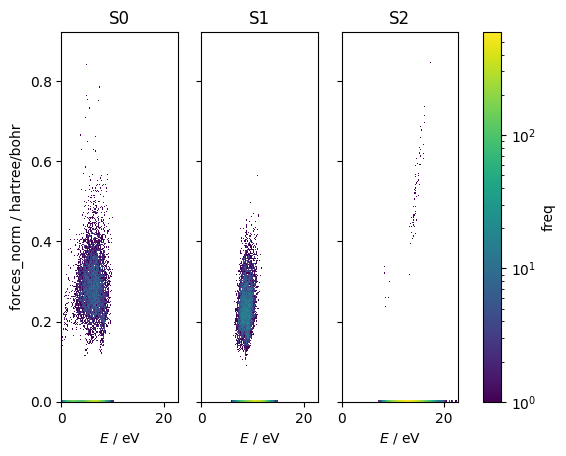

In [49]:
xvar = 'energy'
yvar = 'forces_norm'
# Extract data range for variables
range_ = [
    [np.nanmin(per_state[xvar]).item(), np.nanmax(per_state[xvar]).item()],
    [np.nanmin(per_state[yvar]).item(), np.nanmax(per_state[yvar]).item()]
]
nstates = per_state.sizes['state']
# Set up subplots
fig, axs = plt.subplots(1, nstates, sharey=True)

def get_axis_label(da):
    """Generate axis label with variable name and unit."""
    return f"{da.attrs.get('long_name', da.name)} / {da.attrs.get('units', '?')}"

# Get labels with units
xlabel = get_axis_label(per_state[xvar])
ylabel = get_axis_label(per_state[yvar])

axs[0].set_ylabel(ylabel)
hists = []
qms = []
# Plot histograms
for i, (state, sdata) in enumerate(per_state.groupby('state')):
    sdata = sdata.squeeze('state')
    hist, _, _, qm = axs[i].hist2d(xvar, yvar, data=sdata, label=state, bins=300, range=range_)
    hists.append(hist)
    qms.append(qm)
    axs[i].set_xlabel(xlabel)
    axs[i].set_title(sdata.state_names.item())

# Ensure consistent colour scale across subplots
hists = np.array(hists)
hists[hists==0] = np.nan
zmin = np.nanmin(hists).item()
zmax = np.nanmax(hists).item()
print(f"{zmin=},{zmax=}")

# for a linear colour scale, change `LogNorm` to `Normalize` on the following line:
cnorm = mpl.colors.LogNorm(zmin, zmax)
for qm in qms:
    qm.set_norm(cnorm)

# Add shared colorbar
fig.colorbar(qms[0], ax=axs, label='freq')